<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install --upgrade --force-reinstall --no-deps kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"davidlealo","key":"fbe663a379392d0c356f5869d9d6cebd"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle models list

Next Page Token = CfDJ8EjpvNnYgNtGoWS2kk3rGCLFU7YrxgwMjxvt2Ozpz2f9FdX6zWgOsZdZ_5Dd4_31_XAWuJ2XC4banPOzJr5O9NM
    id  ref                                  title                     subtitle                                                                                                                                                                                                                                                  author          
------  -----------------------------------  ------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------  --------------  
446705  qwen-lm/qwen3-next-80b               Qwen3 Next 80B            Qwen3-Next-80B-A3B is the first installment in the Qwen3-Next series and features the following key enchancements like Hybrid Attention, High-S

In [7]:
!kaggle datasets list -s mobile-price-classification

ref                                                               title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
iabhishekofficial/mobile-price-classification                     Mobile Price Classification                             72340  2018-01-28 08:44:24.237000         235354       2402  0.7058824        
jacksondivakarr/phone-classification-dataset                      Phone Classification Dataset                           210416  2023-12-12 15:21:07.330000           8222         91  1.0              
mbsoroush/mobile-price-range                                      Mobile Price Range                                      72340  2024-07-29 08:05:56.637000           2342         43  1.0          

In [8]:
!kaggle datasets download -d iabhishekofficial/mobile-price-classification

Dataset URL: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification
License(s): unknown
  0% 0.00/70.6k [00:00<?, ?B/s]
100% 70.6k/70.6k [00:00<00:00, 198MB/s]


In [11]:
!unzip "/content/mobile-price-classification.zip"

Archive:  /content/mobile-price-classification.zip
  inflating: test.csv                
  inflating: train.csv               


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

# Mobile Price Classification Dataset

Este conjunto de datos proviene de [Kaggle](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification) y está diseñado para problemas de **clasificación supervisada**.  
El objetivo es predecir el **rango de precio** de un teléfono móvil basado en sus características técnicas.

## Descripción general

- **Número de filas:** 2,000+
- **Número de columnas:** 21
- **Tipo de problema:** Clasificación (rango de precio: 0, 1, 2, 3)
- **Rango de precios:**
  - 0: menos de $100
  - 1: $100–200
  - 2: $200–300
  - 3: más de $300

## Variables

A continuación, se detallan todas las variables del dataset:

- **id**: Identificador único de cada teléfono móvil.
- **battery_power**: Potencia de la batería del teléfono en mAh.
- **blue**: Indica si el teléfono tiene conectividad Bluetooth (1 = sí, 0 = no).
- **clock_speed**: Velocidad del procesador en GHz.
- **dual_sim**: Indica si el teléfono soporta Dual SIM (1 = sí, 0 = no).
- **fc**: Resolución de la cámara frontal en megapíxeles.
- **four_g**: Indica si el teléfono soporta red 4G (1 = sí, 0 = no).
- **int_memory**: Memoria interna del teléfono en GB.
- **m_dep**: Profundidad del teléfono (thickness) en cm.
- **mobile_wt**: Peso del teléfono en gramos.
- **n_cores**: Número de núcleos del procesador.
- **pc**: Resolución de la cámara principal en megapíxeles.
- **px_height**: Altura de la resolución de la pantalla en píxeles.
- **px_width**: Ancho de la resolución de la pantalla en píxeles.
- **ram**: Memoria RAM en MB.
- **sc_h**: Altura de la pantalla en cm.
- **sc_w**: Ancho de la pantalla en cm.
- **talk_time**: Duración de la batería en horas de conversación.
- **three_g**: Indica si el teléfono soporta red 3G (1 = sí, 0 = no).
- **touch_screen**: Indica si el teléfono tiene pantalla táctil (1 = sí, 0 = no).
- **wifi**: Indica si el teléfono tiene conectividad Wi-Fi (1 = sí, 0 = no).
- **price_range**: Rango de precio del teléfono (0, 1, 2, 3).

## Uso sugerido

Este dataset es ideal para:

- Practicar **modelos de clasificación**: árboles de decisión, Random Forest, SVM, redes neuronales, etc.
- Explorar **ingeniería de características**, escalado de datos y análisis exploratorio.
- Aprender a evaluar modelos con **accuracy**, **F1-score**, **matriz de confusión**, etc.


In [17]:
df_train

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [18]:
df_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [19]:
df_train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

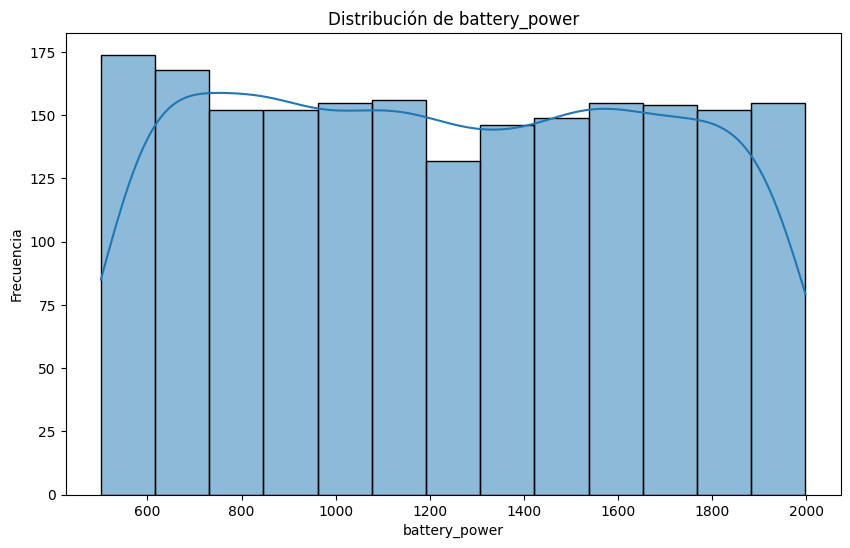

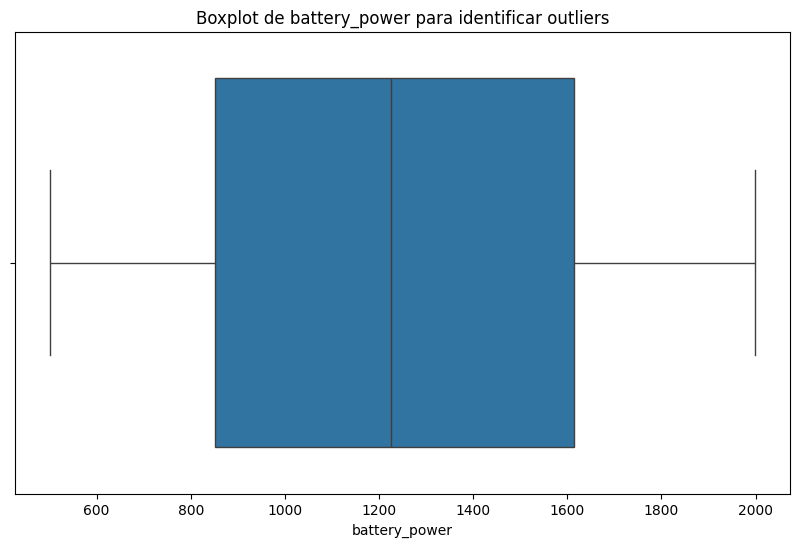

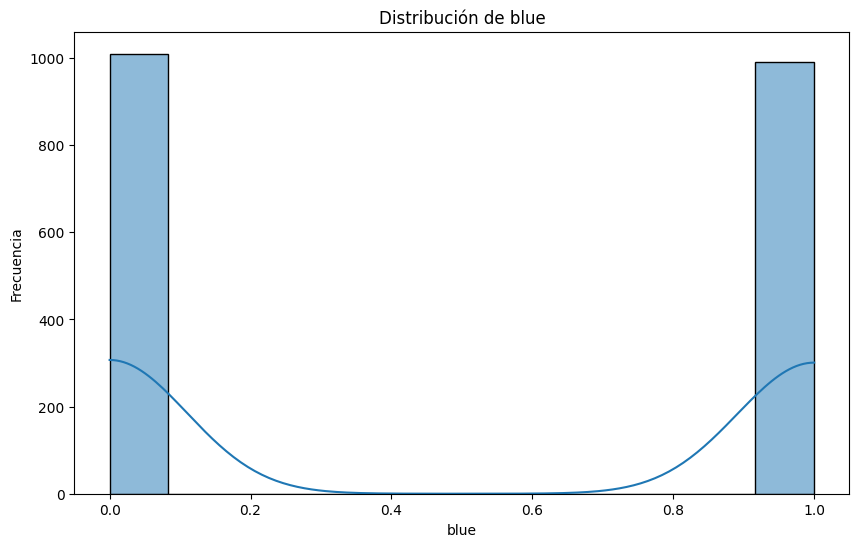

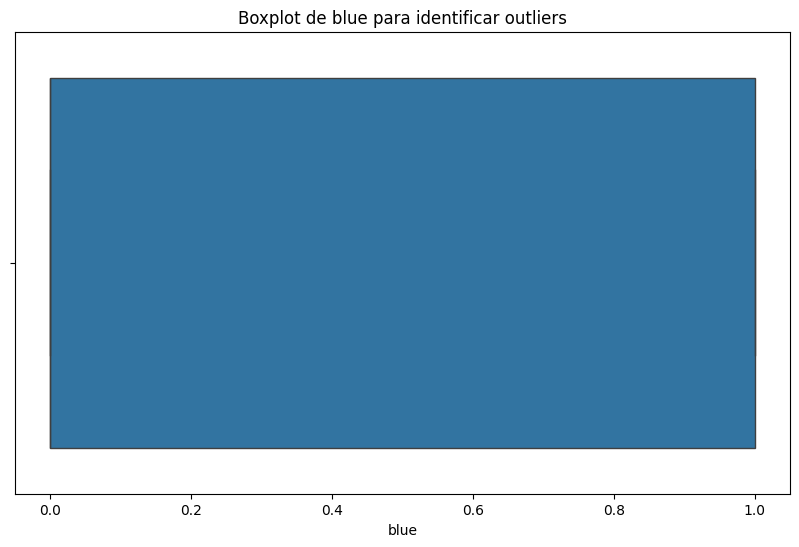

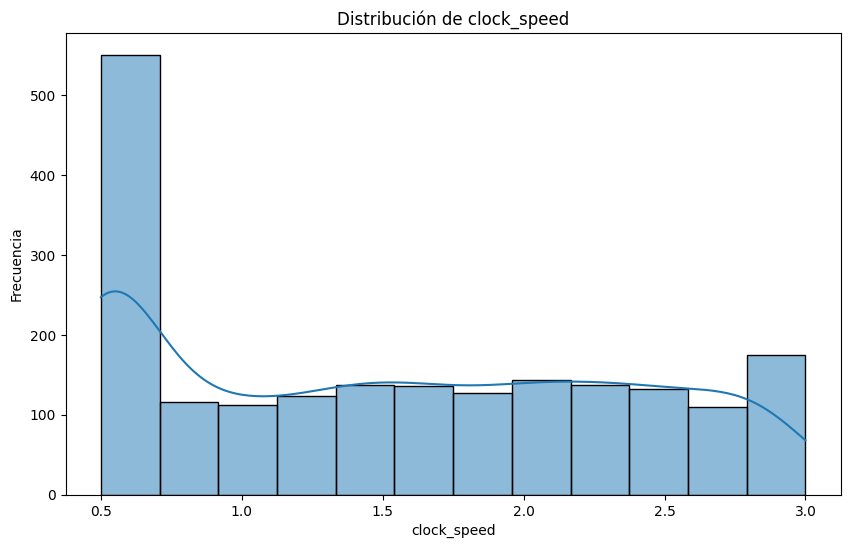

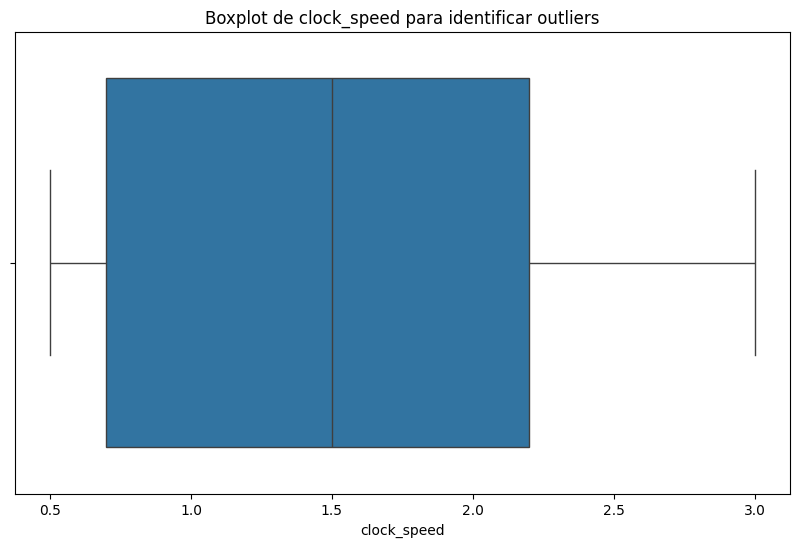

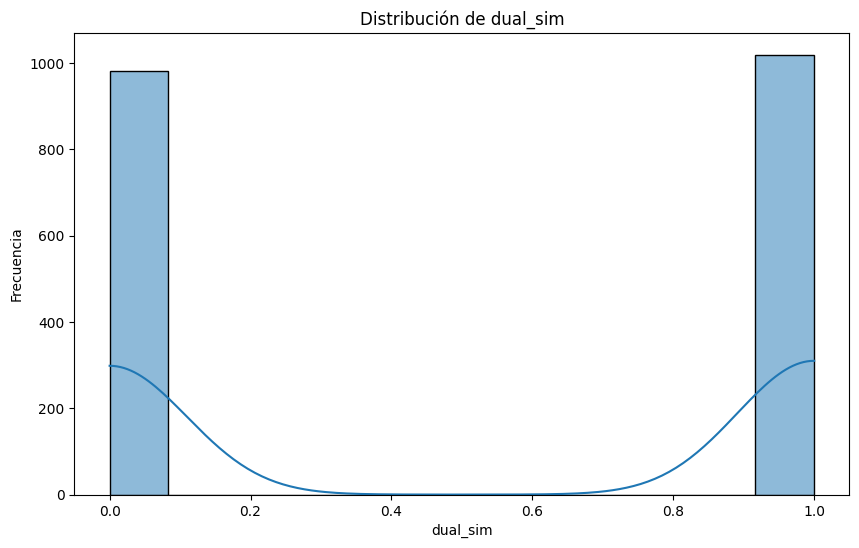

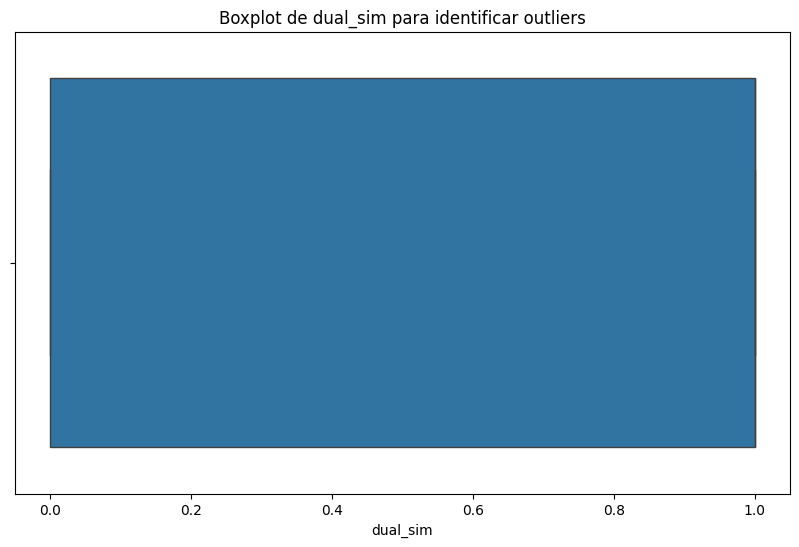

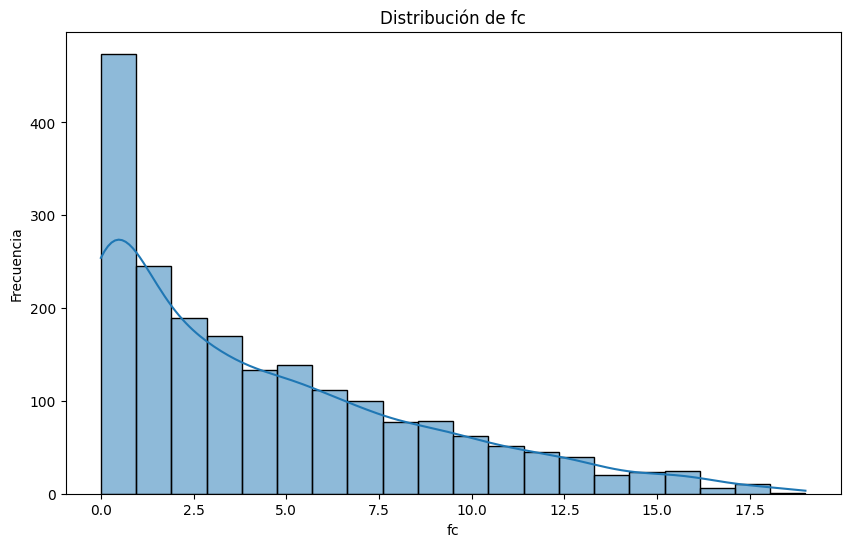

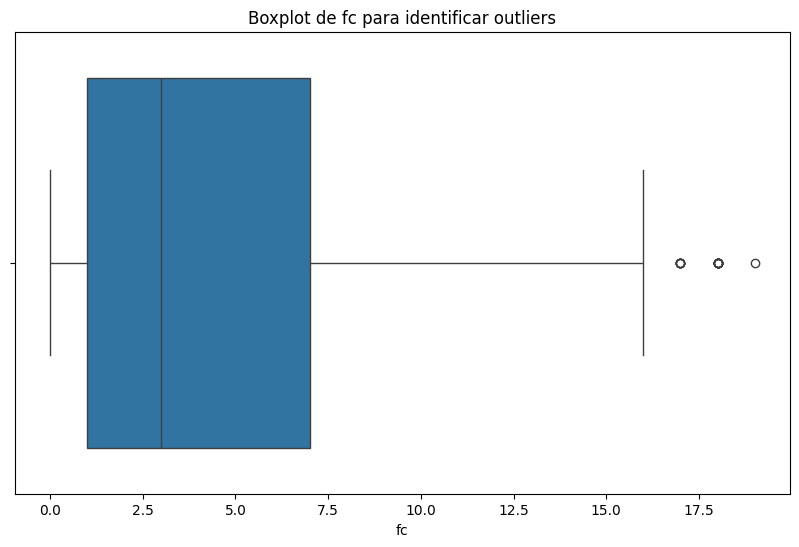

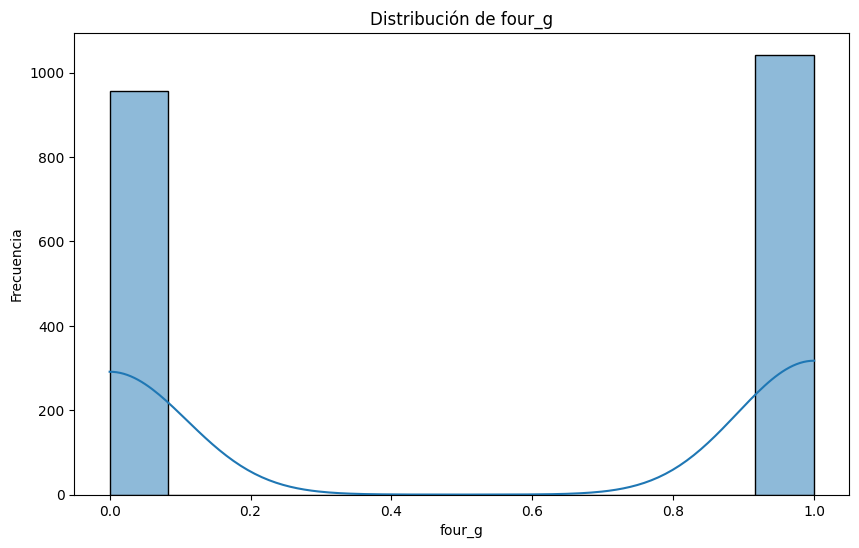

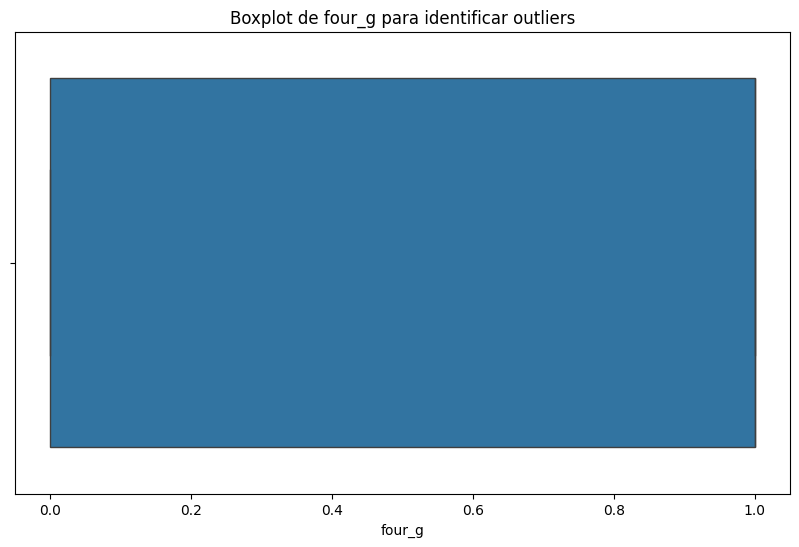

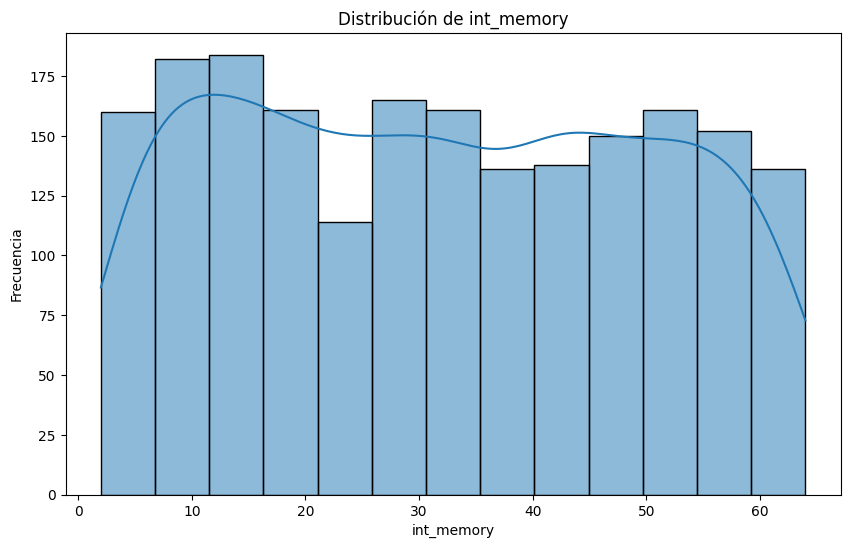

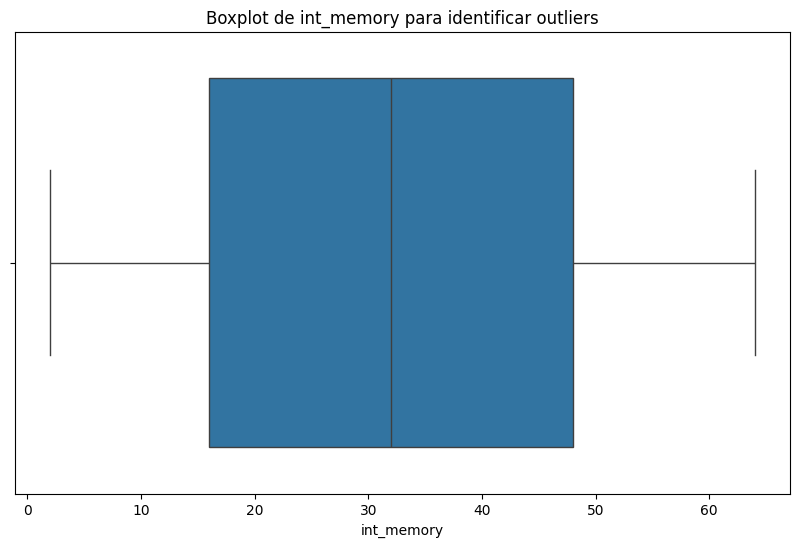

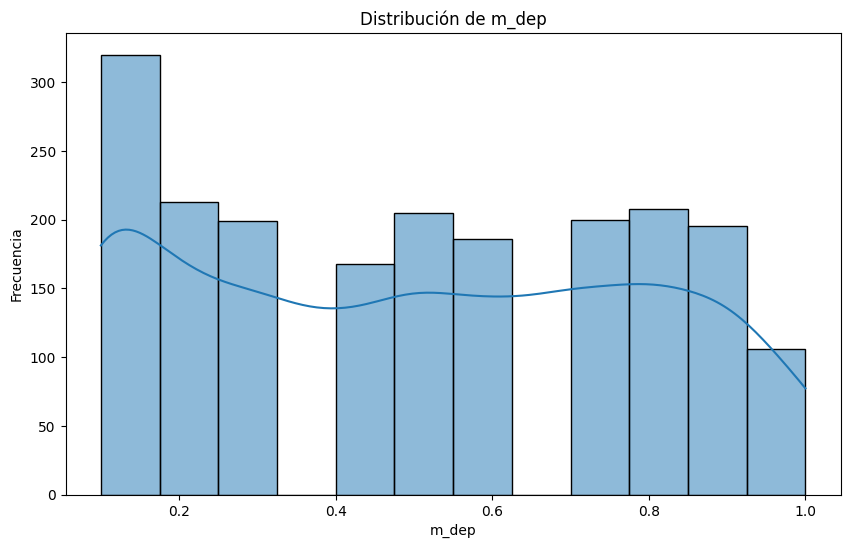

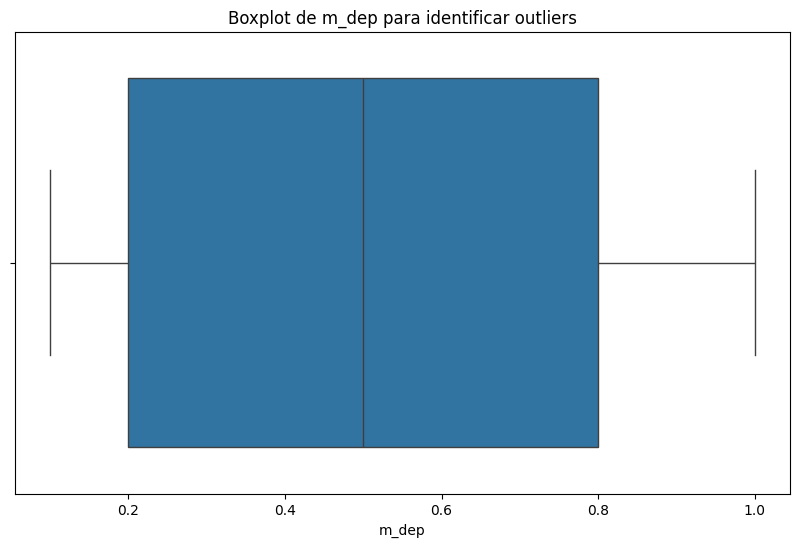

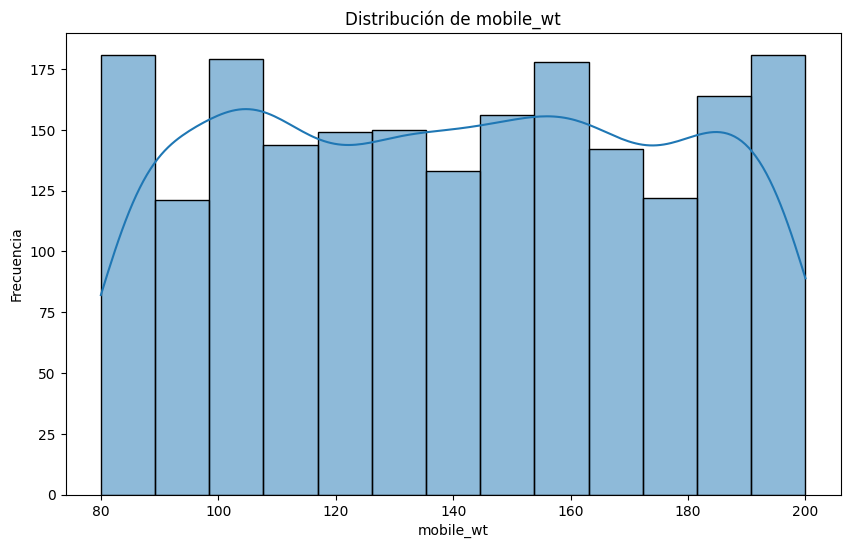

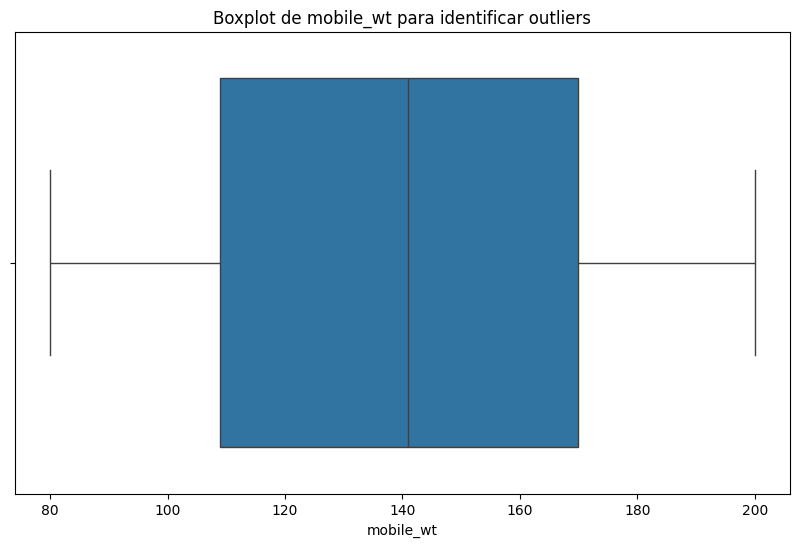

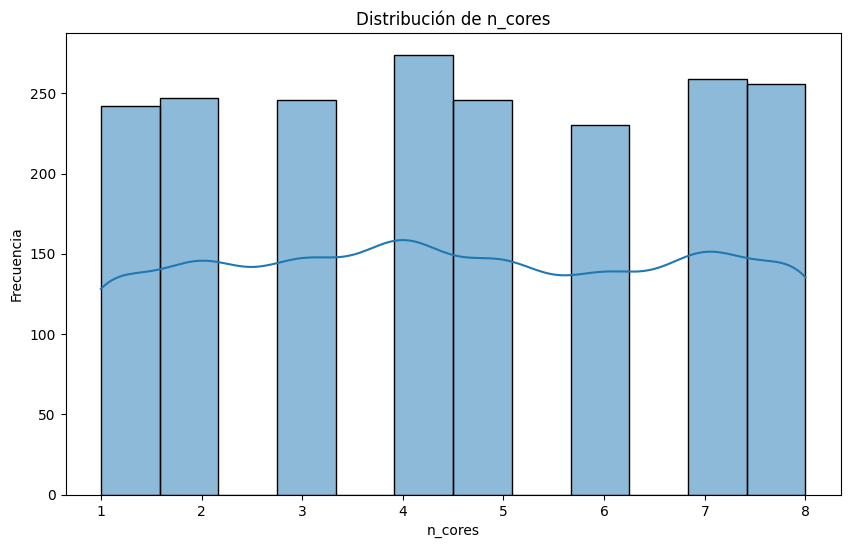

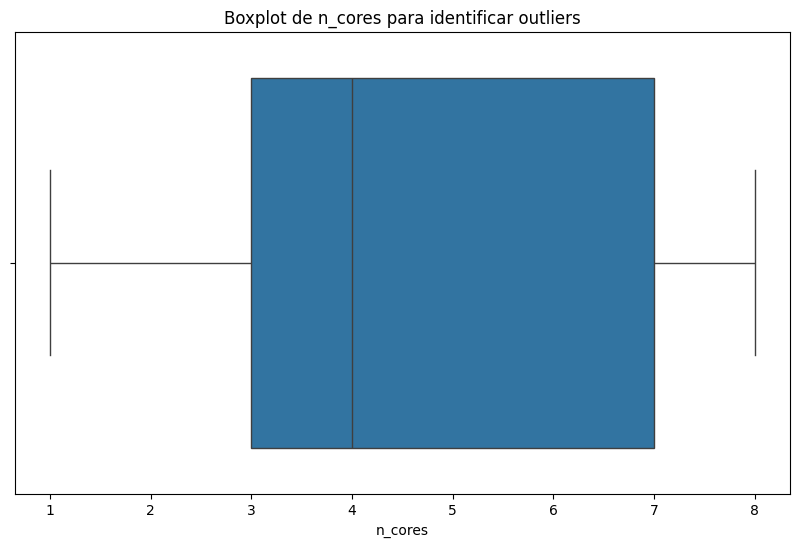

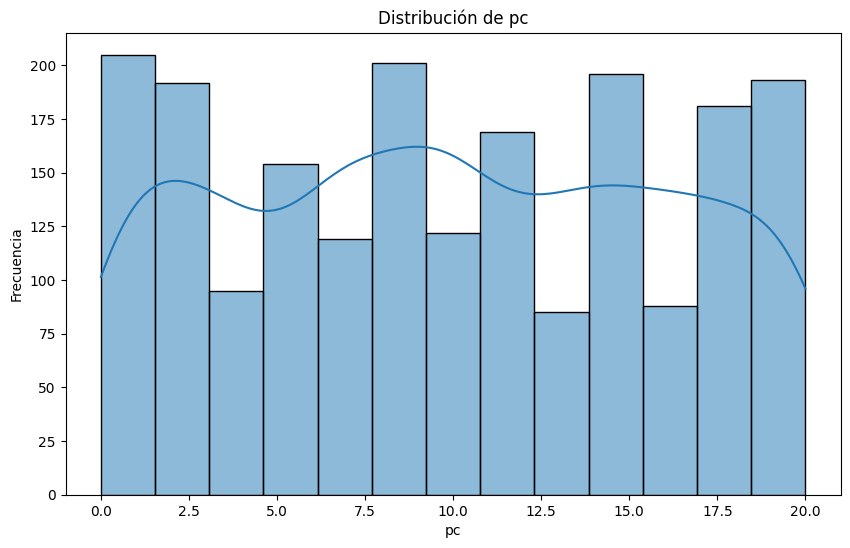

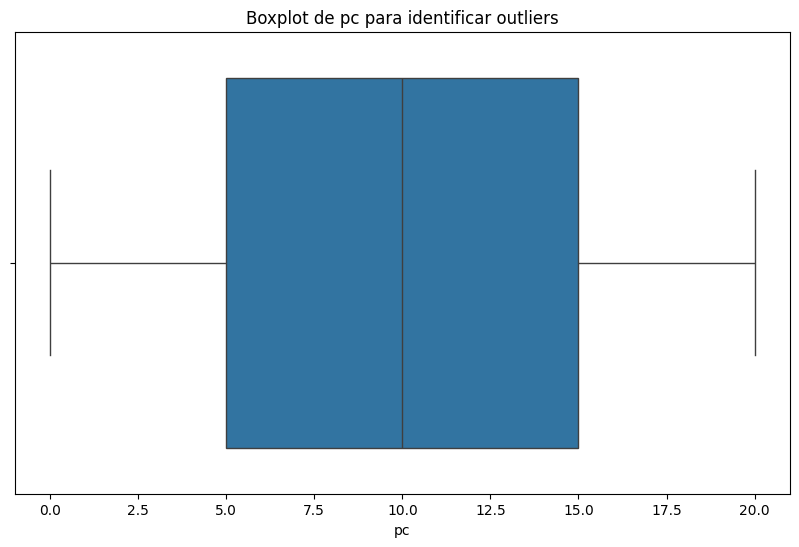

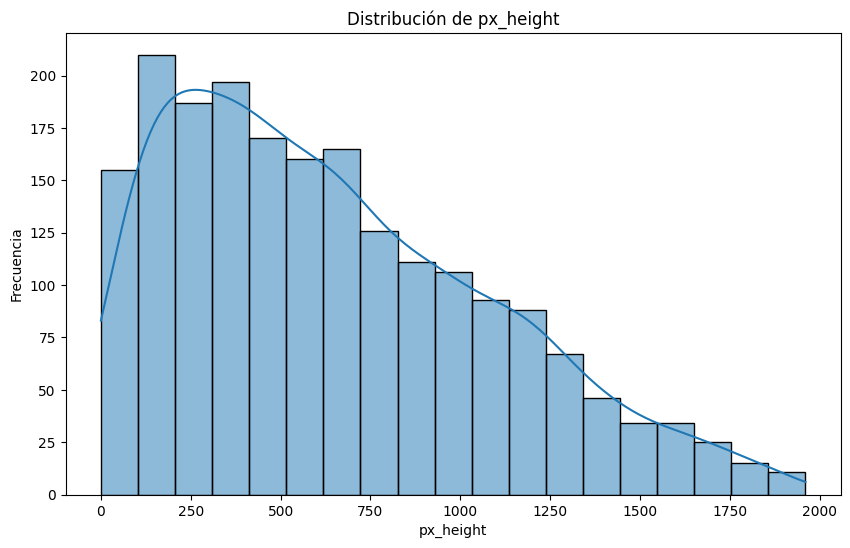

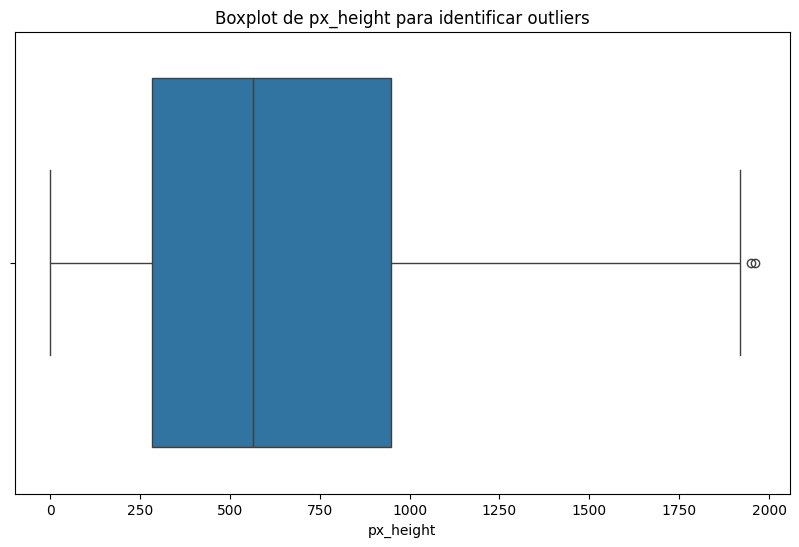

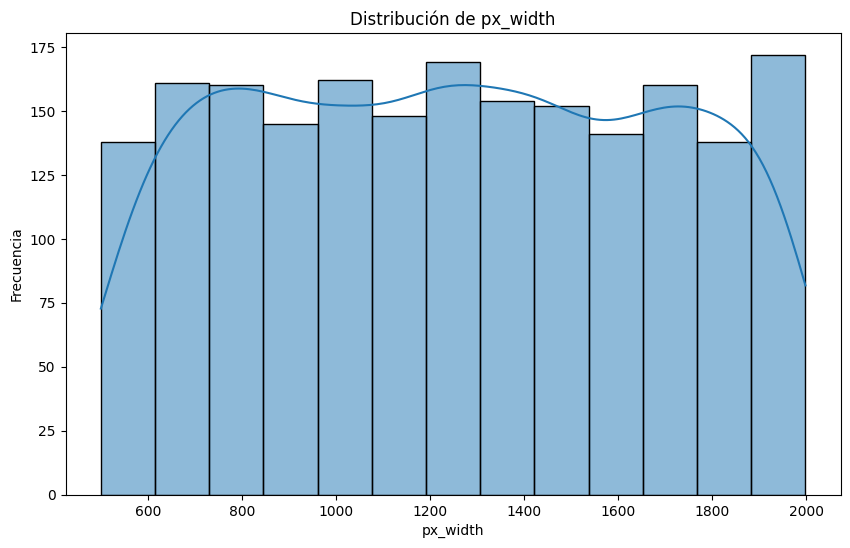

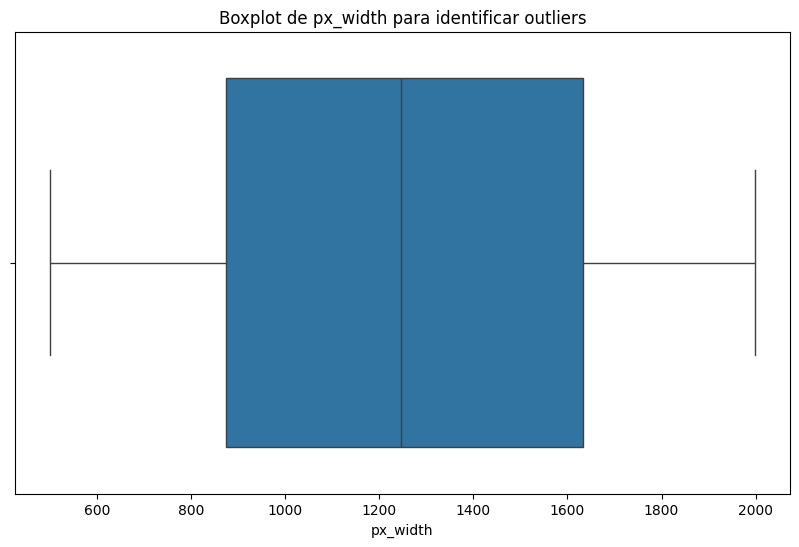

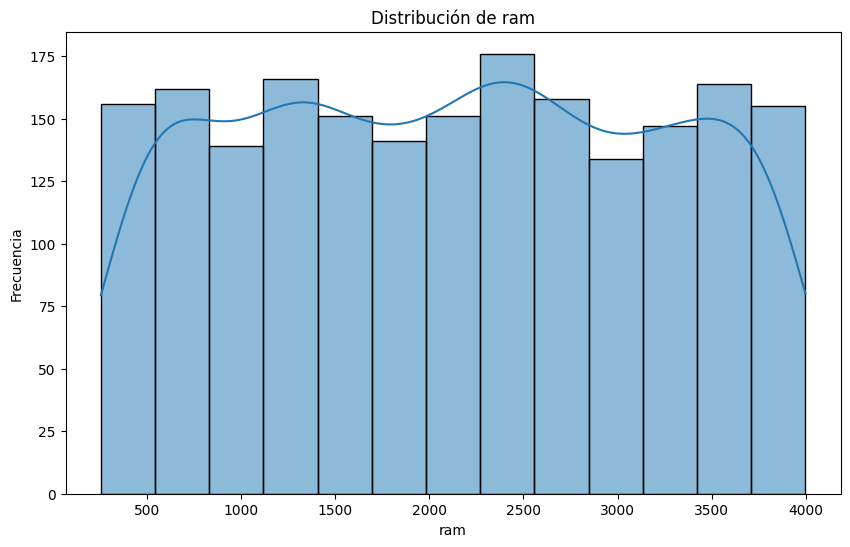

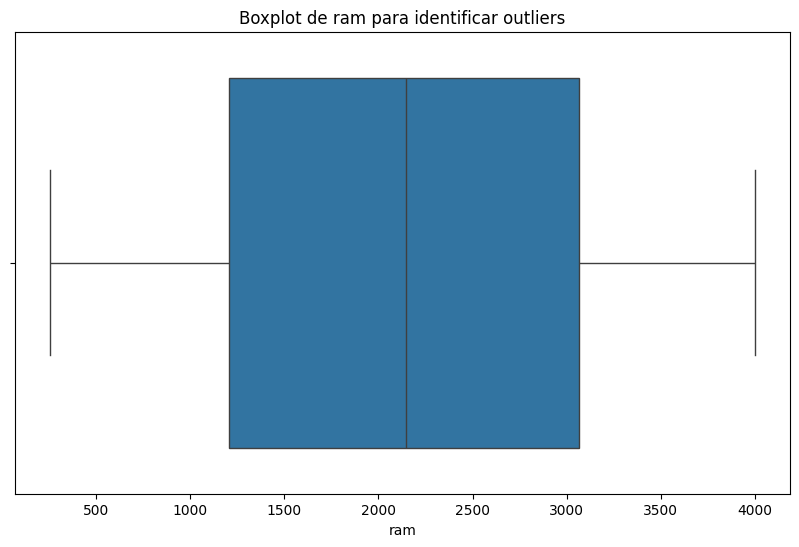

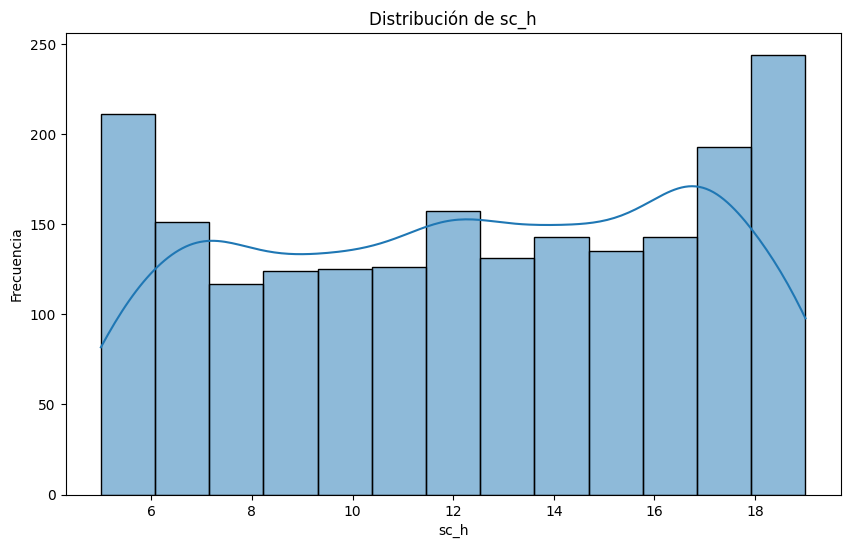

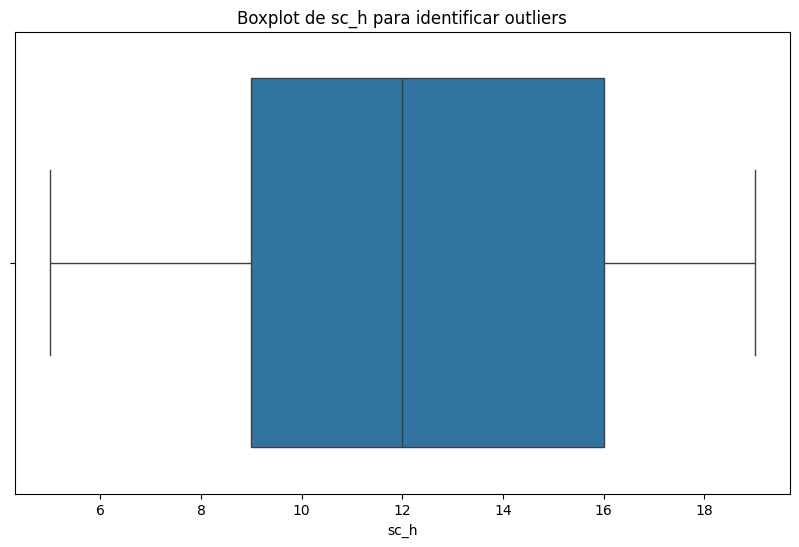

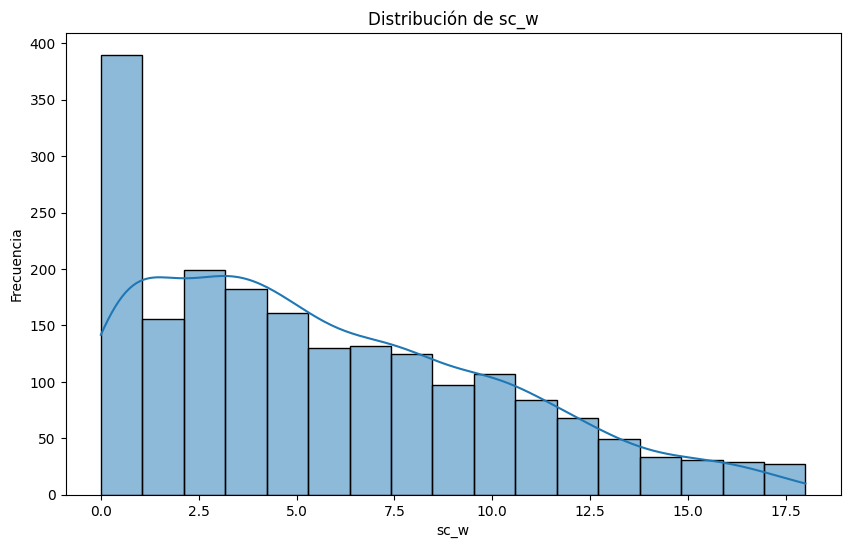

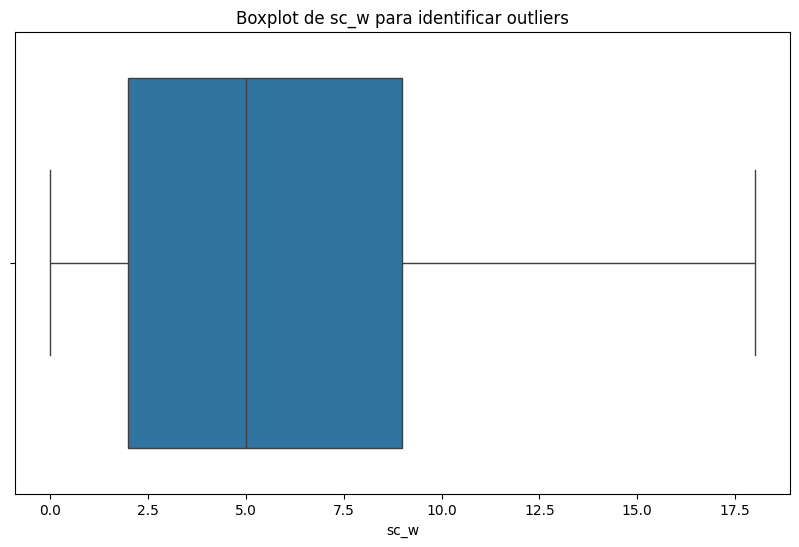

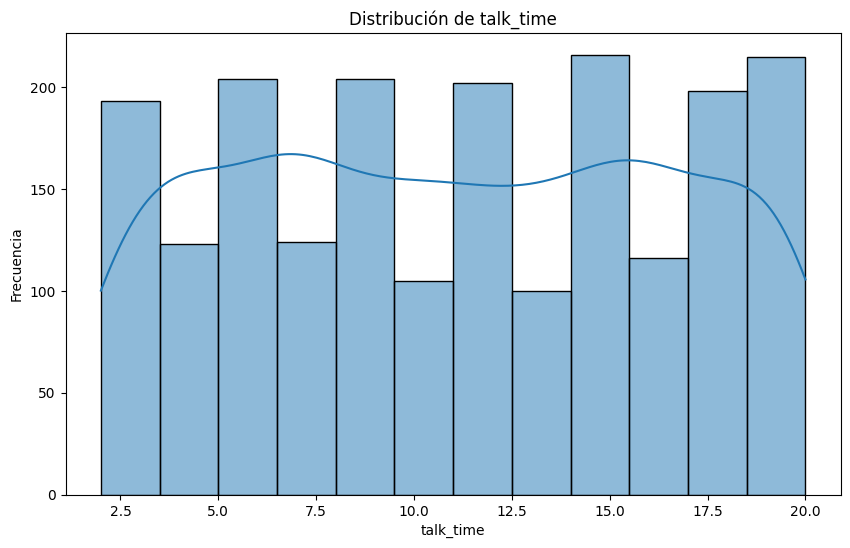

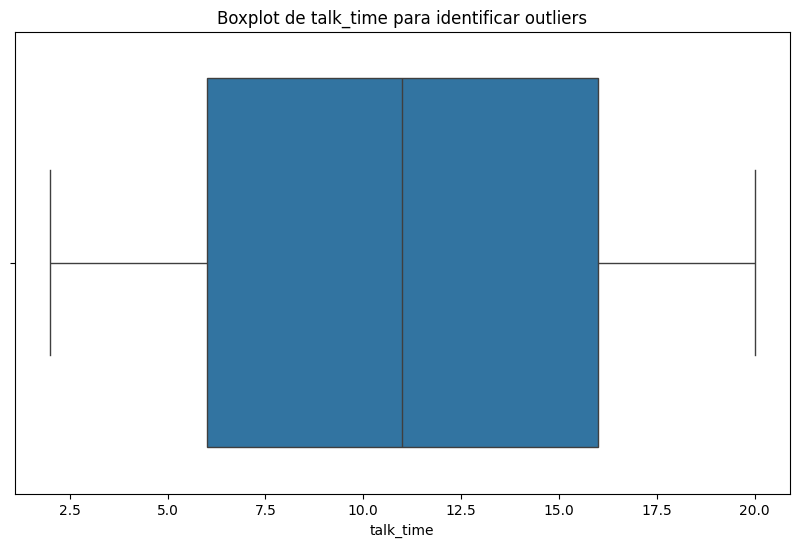

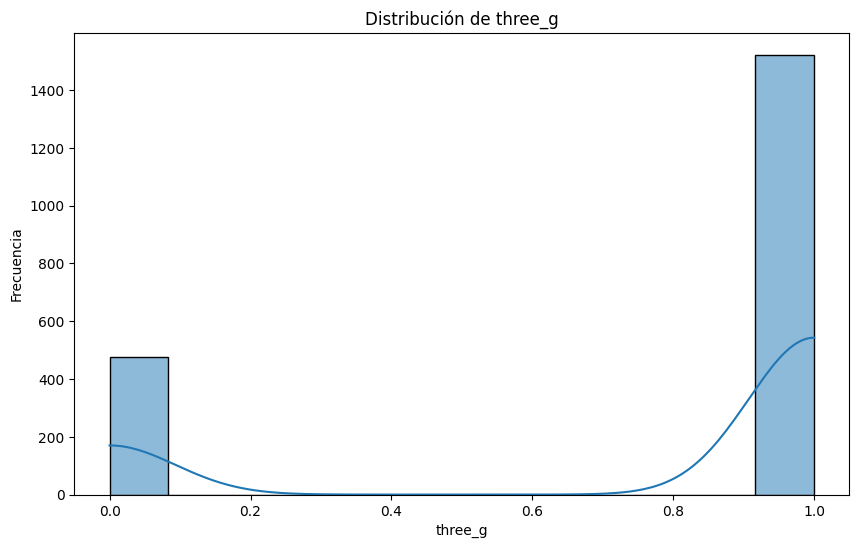

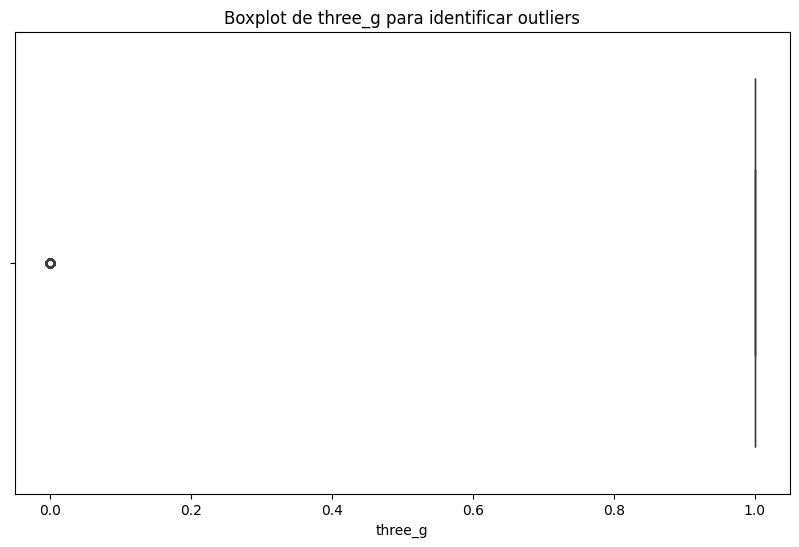

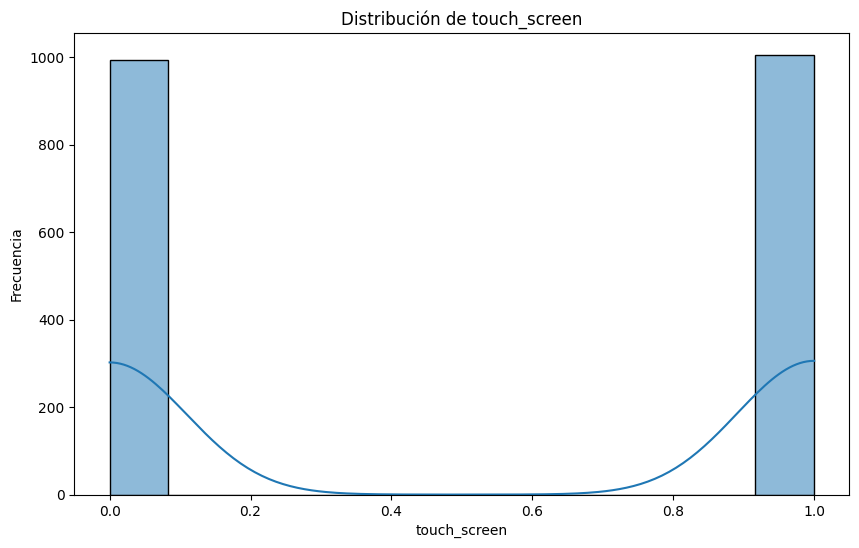

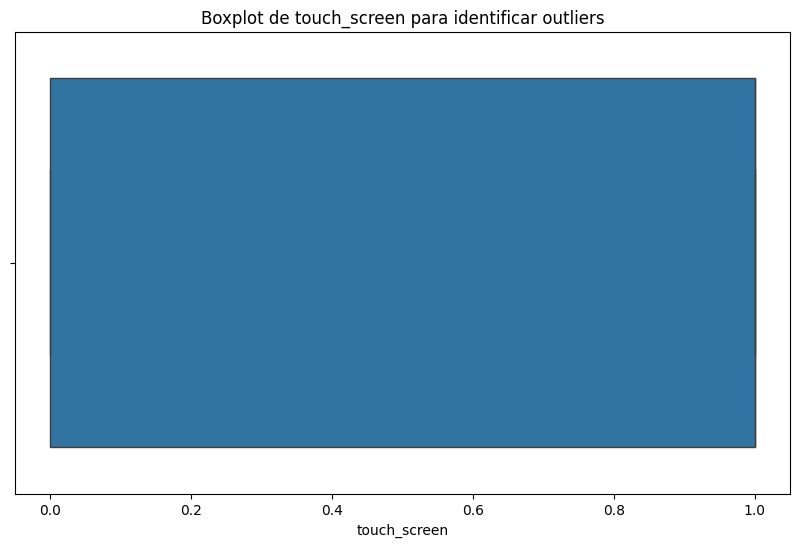

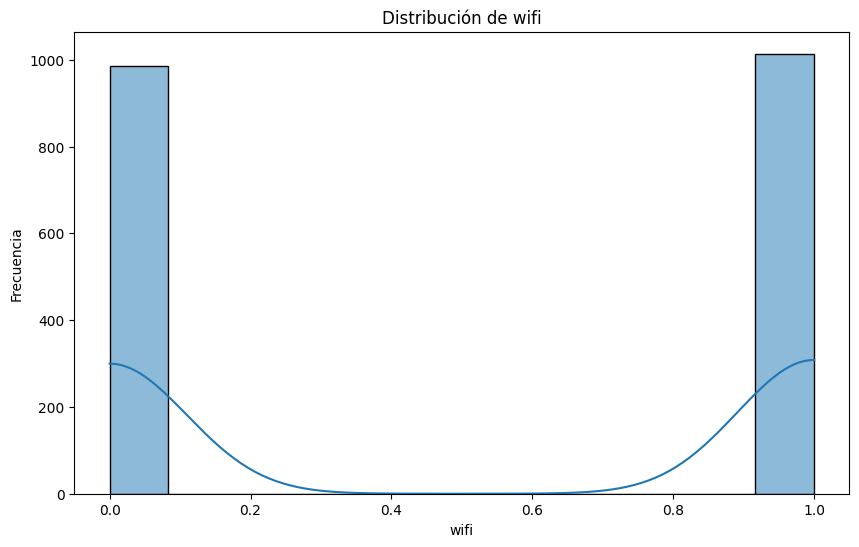

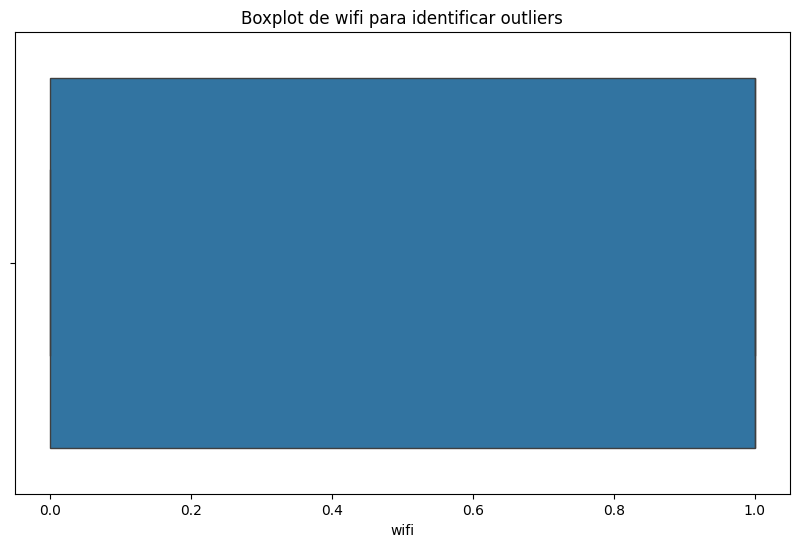

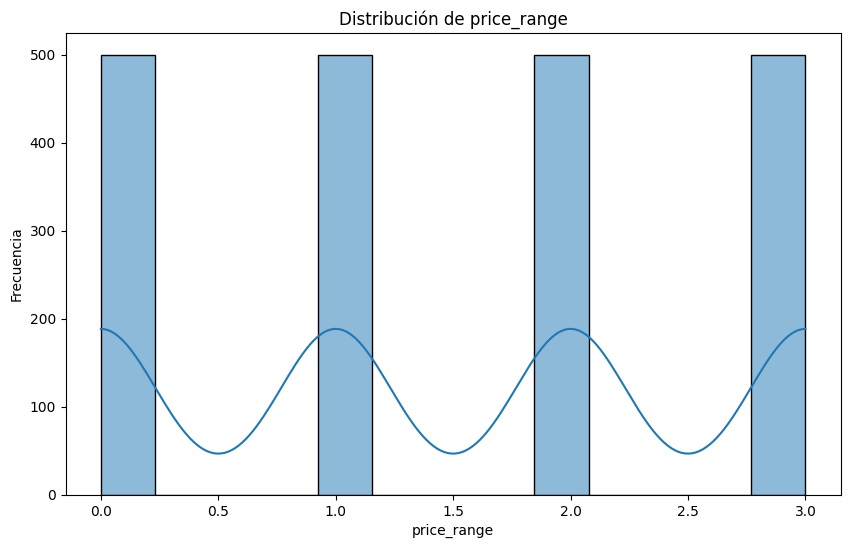

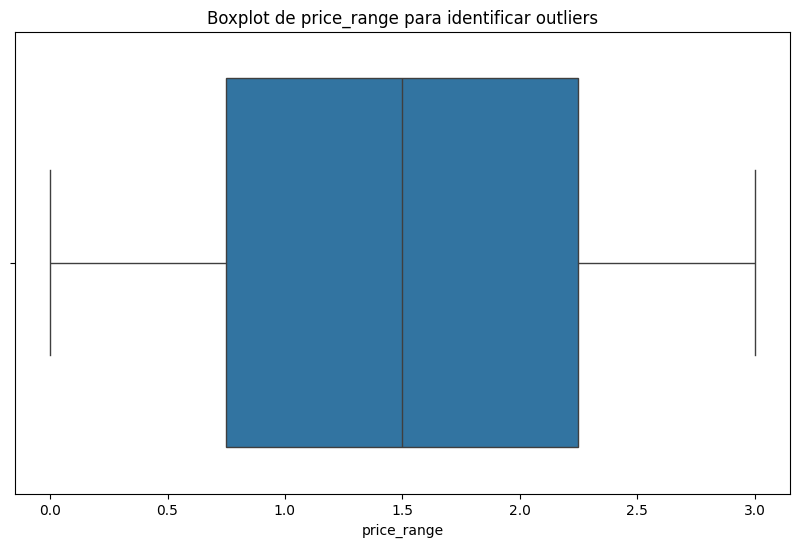

In [20]:
# Visualización de la distribución y outliers
num_cols = df_train.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_train[col], kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_train[col])
    plt.title(f'Boxplot de {col} para identificar outliers')
    plt.xlabel(col)
    plt.show()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
95             1137     1          1.0         0  18       0           7   
226            1708     1          2.4         1  18       1          49   
305            1348     0          2.0         0  18       0          52   
1387           1533     1          1.1         1  18       1          17   
1406           1731     1          2.3         1  18       0          60   
1416           1448     0          0.5         1  18       0           2   
1554           1957     0          1.2         1  18       1          36   
1693            695     0          0.5         0  18       1          12   
1705           1290     1          1.4         1  19       1          35   
1880           1720     0          1.6         0  18       1           2   
1882            591     0          2.1         1  18       1          16   
1888           1544     0          2.4         0  18       1          12   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
95      1.0        196        3  ...        942      1179  3616    13     5   
226     0.1        109        1  ...        233       517  3388     6     4   
305     0.3         98        3  ...       1869      1942   955    18    11   
1387    0.3        160        4  ...       1054      1393  2520     8     2   
1406    0.5        171        4  ...        142      1039  1220     9     3   
1416    0.2        100        5  ...        846      1144   593     9     4   
1554    0.8        151        2  ...       1194      1727  1115    16     2   
1693    0.6        196        2  ...       1649      1829  2855    16    13   
1705    0.3        110        4  ...        405       742   879    16     2   
1880    0.8        188        5  ...        334       896  2522    10     5   
1882    0.5        196        7  ...        952      1726   704    14     5   
1888    0.1        186        7  ...        470       844   489     9     4   

      talk_time  three_g  touch_screen  wifi  price_range  
95           12        1             1     1            3  
226          16        1             1     1            3  
305           7        1             1     1            1  
1387         11        1             0     1            2  
1406         20        0             1     0            1  
1416         18        1             1     1            0  
1554         18        1             0     1            1  
1693          7        1             1     1            2  
1705          8        1             0     0            0  
1880          2        1             0     1            2  
1882          4        1             1     1            0  
1888          2        1             0     1            0  

[12 rows x 21 columns]

In [25]:
df_train.corr()

battery_power      blue  clock_speed  dual_sim        fc  \
battery_power       1.000000  0.011252     0.011482 -0.041847  0.033334   
blue                0.011252  1.000000     0.021419  0.035198  0.003593   
clock_speed         0.011482  0.021419     1.000000 -0.001315 -0.000434   
dual_sim           -0.041847  0.035198    -0.001315  1.000000 -0.029123   
fc                  0.033334  0.003593    -0.000434 -0.029123  1.000000   
four_g              0.015665  0.013443    -0.043073  0.003187 -0.016560   
int_memory         -0.004004  0.041177     0.006545 -0.015679 -0.029133   
m_dep               0.034085  0.004049    -0.014364 -0.022142 -0.001791   
mobile_wt           0.001844 -0.008605     0.012350 -0.008979  0.023618   
n_cores            -0.029727  0.036161    -0.005724 -0.024658 -0.013356   
pc                  0.031441 -0.009952    -0.005245 -0.017143  0.644595   
px_height           0.014901 -0.006872    -0.014523 -0.020875 -0.009990   
px_width           -0.008402 -0.041533    -0.009476  0.014291 -0.005176   
ram                -0.000653  0.026351     0.003443  0.041072  0.015099   
sc_h               -0.029959 -0.002952    -0.029078 -0.011949 -0.011014   
sc_w               -0.021421  0.000613    -0.007378 -0.016666 -0.012373   
talk_time           0.052510  0.013934    -0.011432 -0.039404 -0.006829   
three_g             0.011522 -0.030236    -0.046433 -0.014008  0.001793   
touch_screen       -0.010516  0.010061     0.019756 -0.017117 -0.014828   
wifi               -0.008343 -0.021863    -0.024471  0.022740  0.020085   
price_range         0.200723  0.020573    -0.006606  0.017444  0.021998   

                 four_g  int_memory     m_dep  mobile_wt   n_cores  ...  \
battery_power  0.015665   -0.004004  0.034085   0.001844 -0.029727  ...   
blue           0.013443    0.041177  0.004049  -0.008605  0.036161  ...   
clock_speed   -0.043073    0.006545 -0.014364   0.012350 -0.005724  ...   
dual_sim       0.003187   -0.015679 -0.022142  -0.008979 -0.024658  ...   
fc            -0.016560   -0.029133 -0.001791   0.023618 -0.013356  ...   
four_g         1.000000    0.008690 -0.001823  -0.016537 -0.029706  ...   
int_memory     0.008690    1.000000  0.006886  -0.034214 -0.028310  ...   
m_dep         -0.001823    0.006886  1.000000   0.021756 -0.003504  ...   
mobile_wt     -0.016537   -0.034214  0.021756   1.000000 -0.018989  ...   
n_cores       -0.029706   -0.028310 -0.003504  -0.018989  1.000000  ...   
pc            -0.005598   -0.033273  0.026282   0.018844 -0.001193  ...   
px_height     -0.019236    0.010441  0.025263   0.000939 -0.006872  ...   
px_width       0.007448   -0.008335  0.023566   0.000090  0.024480  ...   
ram            0.007313    0.032813 -0.009434  -0.002581  0.004868  ...   
sc_h           0.027166    0.037771 -0.025348  -0.033855 -0.000315  ...   
sc_w           0.037005    0.011731 -0.018388  -0.020761  0.025826  ...   
talk_time     -0.046628   -0.002790  0.017003   0.006209  0.013148  ...   
three_g        0.584246   -0.009366 -0.012065   0.001551 -0.014733  ...   
touch_screen   0.016758   -0.026999 -0.002638  -0.014368  0.023774  ...   
wifi          -0.017620    0.006993 -0.028353  -0.000409 -0.009964  ...   
price_range    0.014772    0.044435  0.000853  -0.030302  0.004399  ...   

               px_height  px_width       ram      sc_h      sc_w  talk_time  \
battery_power   0.014901 -0.008402 -0.000653 -0.029959 -0.021421   0.052510   
blue           -0.006872 -0.041533  0.026351 -0.002952  0.000613   0.013934   
clock_speed    -0.014523 -0.009476  0.003443 -0.029078 -0.007378  -0.011432   
dual_sim       -0.020875  0.014291  0.041072 -0.011949 -0.016666  -0.039404   
fc             -0.009990 -0.005176  0.015099 -0.011014 -0.012373  -0.006829   
four_g         -0.019236  0.007448  0.007313  0.027166  0.037005  -0.046628   
int_memory      0.010441 -0.008335  0.032813  0.037771  0.011731  -0.002790   
m_dep           0.025263  0.023566 -0.009434 -0.025348 -0.018388   0.017003   
mo

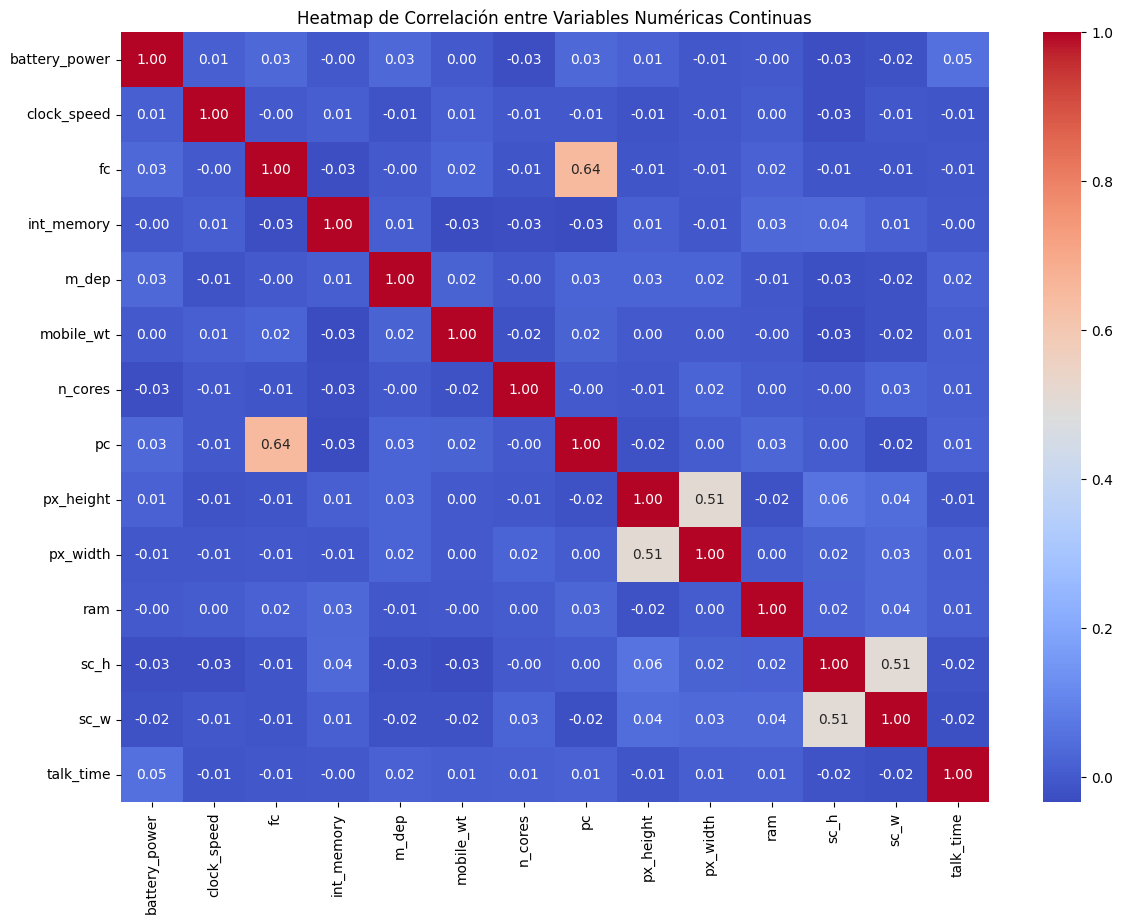

In [26]:
# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Visualizar el heatmap con los valores de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación entre Variables Numéricas Continuas')
plt.show()

In [27]:
from sklearn.preprocessing import MinMaxScaler

# Excluir las columnas binarias (dummies)
dummy_cols = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
numeric_cols = [col for col in df_train.columns if col not in dummy_cols]

# Crear un DataFrame solo con las columnas numéricas continuas
df_numeric = df_train[numeric_cols]

# Aplicar MinMaxScaler a las columnas numéricas continuas
scaler = MinMaxScaler()
df_train_scaled = df_train.copy()
df_train_scaled[numeric_cols] = scaler.fit_transform(df_numeric)

# Mostrar las primeras filas del DataFrame escalado para verificar
display(df_train_scaled.head())

battery_power  blue  clock_speed  dual_sim        fc  four_g  int_memory  \
0       0.227789     0         0.68         0  0.052632       0    0.080645   
1       0.347361     1         0.00         1  0.000000       1    0.822581   
2       0.041416     1         0.00         1  0.105263       1    0.629032   
3       0.076152     1         0.80         0  0.000000       0    0.129032   
4       0.881764     1         0.28         0  0.684211       1    0.677419   

      m_dep  mobile_wt   n_cores  ...  px_height  px_width       ram  \
0  0.555556   0.900000  0.142857  ...   0.010204  0.170895  0.612774   
1  0.666667   0.466667  0.285714  ...   0.461735  0.993324  0.634687   
2  0.888889   0.541667  0.571429  ...   0.644388  0.811749  0.627205   
3  0.777778   0.425000  0.714286  ...   0.620408  0.858478  0.671566   
4  0.555556   0.508333  0.142857  ...   0.616327  0.475300  0.308658   

       sc_h      sc_w  talk_time  three_g  touch_screen  wifi  price_range  
0  0.285714  0.388889   0.944444        0             0     1            1  
1  0.857143  0.166667   0.277778        1             1     0            2  
2  0.428571  0.111111   0.388889        1             1     0            2  
3  0.785714  0.444444   0.500000        1             0     0            2  
4  0.214286  0.111111   0.722222        1             1     0            1  

[5 rows x 21 columns]

In [28]:
df_test

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0       1           1043     1          1.8         1  14       0           5   
1       2            841     1          0.5         1   4       1          61   
2       3           1807     1          2.8         0   1       0          27   
3       4           1546     0          0.5         1  18       1          25   
4       5           1434     0          1.4         0  11       1          49   
..    ...            ...   ...          ...       ...  ..     ...         ...   
995   996           1700     1          1.9         0   0       1          54   
996   997            609     0          1.8         1   0       0          13   
997   998           1185     0          1.4         0   1       1           8   
998   999           1533     1          0.5         1   0       0          50   
999  1000           1270     1          0.5         0   4       1          35   

     m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0      0.1        193  ...  16        226      1412  3476    12     7   
1      0.8        191  ...  12        746       857  3895     6     0   
2      0.9        186  ...   4       1270      1366  2396    17    10   
3      0.5         96  ...  20        295      1752  3893    10     0   
4      0.5        108  ...  18        749       810  1773    15     8   
..     ...        ...  ...  ..        ...       ...   ...   ...   ...   
995    0.5        170  ...  17        644       913  2121    14     8   
996    0.9        186  ...   2       1152      1632  1933     8     1   
997    0.5         80  ...  12        477       825  1223     5     0   
998    0.4        171  ...  12         38       832  2509    15    11   
999    0.1        140  ...  19        457       608  2828     9     2   

     talk_time  three_g  touch_screen  wifi  
0            2        0             1     0  
1            7        1             0     0  
2           10        0             1     1  
3            7        1             1     0  
4            7        1             0     1  
..         ...      ...           ...   ...  
995         15        1             1     0  
996         19        0             1     1  
997         14        1             0     0  
998          6        0             1     0  
999          3        1             0     1  

[1000 rows x 21 columns]

In [29]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [30]:
df_train['price_binary'] = df_train['price_range'].apply(lambda x: 0 if x <= 1 else 1)
display(df_train[['price_range', 'price_binary']].head())

price_range  price_binary
0            1             0
1            2             1
2            2             1
3            2             1
4            1             0

In [31]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [32]:
print("Frecuencia de valores únicos en 'price_range':")
display(df_train['price_range'].value_counts())

print("\nFrecuencia de valores únicos en 'price_binary':")
display(df_train['price_binary'].value_counts())

Frecuencia de valores únicos en 'price_range':


price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


Frecuencia de valores únicos en 'price_binary':


price_binary
0    1000
1    1000
Name: count, dtype: int64

In [ ]:
# Hacer el split de datos
# Instancia tree classifier
# métricas
# Validación cruzada
# métricas
# Guardar el modelo
# Cargar el modelo y probar con datos nuevos